In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [15]:
def path_cost_tour(tour, distance_matrix):
    return sum(distance_matrix[tour[i - 1], tour[i]] for i in range(len(tour)))

In [16]:
def simulated_annealing(distance_matrix, num_iterations=10000, initial_temp=1000):
    N = len(distance_matrix)
    
    current_solution = list(np.random.permutation(N))
    best_solution = current_solution.copy()
    best_cost = path_cost_tour(current_solution, distance_matrix)
    current_cost = best_cost
    temp = initial_temp

    costs = [best_cost]  

    for iteration in range(1, num_iterations + 1):

        id1, id2 = sorted(random.sample(range(N), 2))
        next_solution = current_solution[:]
        next_solution[id1:id2+1] = reversed(current_solution[id1:id2+1])

        next_cost = path_cost_tour(next_solution, distance_matrix)

        delta_cost = next_cost - current_cost
        if delta_cost < 0 or random.random() < np.exp(-delta_cost / temp):
            current_solution = next_solution
            current_cost = next_cost

            if current_cost < best_cost:
                best_solution = current_solution
                best_cost = current_cost

        temp = initial_temp / (iteration + 1)
        
        costs.append(current_cost)

    return best_solution, best_cost, costs

In [17]:
locations = {
    'Jaipur': (26.9124, 75.7873),
    'Jodhpur': (26.2389, 73.0243),
    'Udaipur': (24.5854, 73.7125),
    'Kota': (25.2138, 75.8648),
    'Ajmer': (26.4499, 74.6399),
    'Bikaner': (28.0229, 73.3119),
    'Alwar': (27.5525, 76.6346),
    'Bundi': (25.4305, 75.6499),
    'Chittorgarh': (24.8887, 74.6269),
    'Sikar': (27.6094, 75.1399),
    'Mount Abu': (24.5927, 72.7156),
    'Jaisalmer': (26.9157, 70.9083),
    'Pali': (25.7711, 73.3234),
    'Tonk': (26.1698, 75.7885),
    'Bharatpur': (27.2152, 77.5010),
    'Dholpur': (26.7025, 77.8937),
    'Barmer': (25.7551, 71.3992),
    'Jhunjhunu': (28.1313, 75.3993),
    'Nagaur': (27.2020, 73.7333),
    'Sawai Madhopur': (25.9941, 76.3660)
}

coords = np.array(list(locations.values()))

In [18]:
N = len(coords)

distance_matrix = np.zeros((N, N))

for i in range(N):
    for j in range(N):
        distance_matrix[i, j] = np.linalg.norm(coords[i] - coords[j])

In [19]:
best_solution, best_cost, costs = simulated_annealing(distance_matrix, num_iterations=10000, initial_temp=1000)

In [20]:
best_solution_names = [list(locations.keys())[i] for i in best_solution]

In [21]:
print("Best Tour:", " -> ".join(best_solution_names))

Best Tour: Nagaur -> Jodhpur -> Pali -> Ajmer -> Jaipur -> Sikar -> Jhunjhunu -> Alwar -> Bharatpur -> Dholpur -> Sawai Madhopur -> Tonk -> Bundi -> Kota -> Chittorgarh -> Udaipur -> Mount Abu -> Barmer -> Jaisalmer -> Bikaner


In [22]:
print("Best Cost:", best_cost)

Best Cost: 22.1138512016891


In [26]:
def plot_tour(coords, solution, title):

    plt.figure(figsize=(8, 6))
    plt.plot(coords[solution, 0], coords[solution, 1], 'o-', label="Tour")

    for i, city in enumerate(solution):
        plt.text(coords[city, 0], coords[city, 1], list(locations.keys())[city])

    plt.title(title)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    
    # plt.show()

Text(0, 0.5, 'Cost')

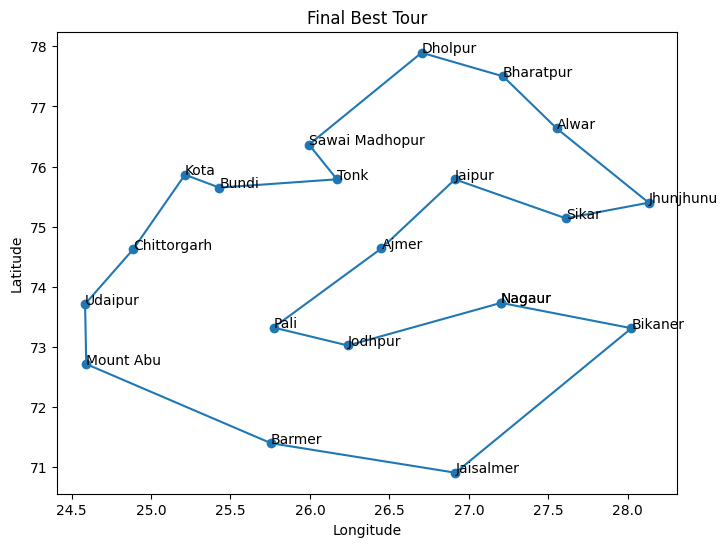

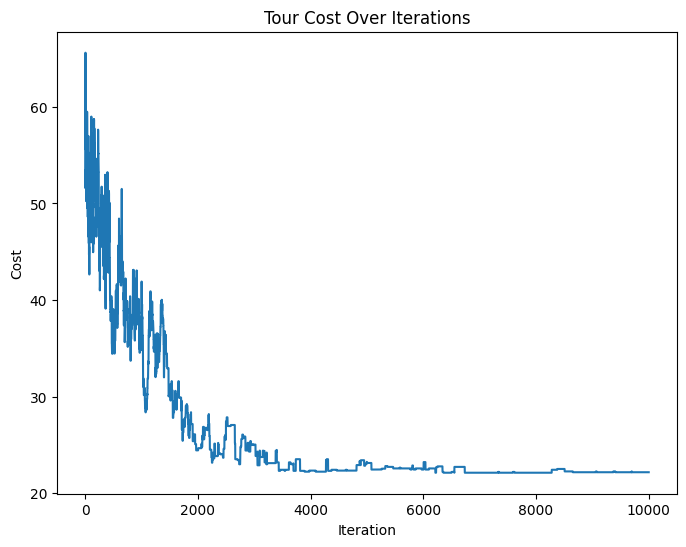

In [27]:
plot_tour(coords, best_solution + [best_solution[0]], "Final Best Tour")

plt.figure(figsize=(8, 6))
plt.plot(costs)
plt.title("Tour Cost Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost")

# plt.show()